In [1]:
# https://www.mindcoolness.com/blog/blog-post-clustering-nlp/

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pip install mpld3

In [4]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS, TSNE
import mpld3
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
import tensorflow as tf
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Dataset

In [5]:
data = pd.read_csv('D:\Projects\Jupyter\Github Docs\datasets\preprocessed_word_correct_token.csv', encoding='utf-8')
data.tail()

,id,index,name,content,sentence,review_score,review_votes,readability,preprocessed_reviews,wordtoken,correctmapping,ngrams_reviews,ngrams_token,lda_reviews,lda_token
163842,275850,163843,No Man's Sky,"No Man's Sky is a game with many problems, the...",Only about 3 or 4 hours of it was me actually ...,-1,0,22.3,only about or hour of it be me actually enjoy ...,"['only', 'about', 'or', 'hour', 'of', 'it', 'b...","['only', 'about', 'or', 'hour', 'of', 'it', 'b...",only about or hour of it be me actually enjoy ...,"['hour', 'actually', 'enjoy', 'the_rest', 'con...",hour actually enjoy rest consist try milk shor...,"['hour', 'actually', 'enjoy', 'rest', 'consist..."
163843,275850,163844,No Man's Sky,"No Man's Sky is a game with many problems, the...",The free roam exploration runs dry very quickl...,-1,0,41.1,the free roam exploration run dry very quickly...,"['the', 'free', 'roam', 'exploration', 'run', ...","['the', 'free', 'roam', 'exploration', 'run', ...",the free roam exploration run dry very quickly...,"['free', 'roam', 'exploration', 'run', 'dry', ...",free roam exploration run dry quickly soon rea...,"['free', 'roam', 'exploration', 'run', 'dry', ..."
163844,275850,163845,No Man's Sky,"No Man's Sky is a game with many problems, the...","Overall, No Man's Sky is a lazy game not even ...",-1,0,9.7,overall no man be sky be a lazy game not even ...,"['overall', 'no', 'man', 'be', 'sky', 'be', 'l...","['overall', 'no', 'man', 'be', 'sky', 'be', 'l...",overall no man be sky be lazy game not even th...,"['overall', 'no_man_be_sky', 'lazy', 'even', '...",overall no man sky lazy even short attention s...,"['overall', 'no_man_sky', 'lazy', 'even', 'sho..."
163845,275850,163846,No Man's Sky,"No Man's Sky is a game with many problems, the...",The game's cycle is essentially go to a planet...,-1,0,23.7,the game be cycle be essentially go to a plane...,"['the', 'game', 'be', 'cycle', 'be', 'essentia...","['the', 'game', 'be', 'cycle', 'be', 'essentia...",the game be cycle be essentially go to planet ...,"['cycle', 'essentially', 'go', 'planet', 'find...",cycle essentially go planet find thing planet ...,"['cycle', 'essentially', 'go', 'planet', 'find..."
163846,275850,163847,No Man's Sky,"No Man's Sky is a game with many problems, the...",Not even considering all of the content Hello ...,-1,0,25.6,not even consider all of the content hello gam...,"['not', 'even', 'consider', 'all', 'of', 'the'...","['not', 'even', 'consider', 'all', 'of', 'the'...",not even consider all of the content hello gam...,"['even', 'consider', 'content', 'hello_games',...",even consider content hello games promise sile...,"['even', 'consider', 'content', 'hello_games',..."


In [6]:
data=data[:200]

In [7]:
eval(data['lda_token'][4])

['clearly',
 'strong',
 'feel',
 'play_hour',
 'hello_games',
 'release',
 'new',
 'update',
 'decide',
 'need',
 'resist',
 'order',
 'see',
 'sort',
 'improvement']

In [8]:
def convert(s):
    s = eval(s)
    s = ' '.join(s)
    return s
data['lda_token_2'] = data['lda_token'].apply(convert)

## Word Vectorization

In [9]:
# tf-idf (term frequency-inverse document frequency)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df = 0.01)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['lda_token_2'])
tfidf_words = tfidf_vectorizer.get_feature_names()

# bag of words (term frequency)
tf_vectorizer = CountVectorizer(stop_words='english', min_df = 0.01)
tf_matrix = tf_vectorizer.fit_transform(data['lda_token_2'])
tf_words = tf_vectorizer.get_feature_names()

tfidf_matrix.shape, tf_matrix.shape

((200, 271), (200, 271))

## Word Frequency

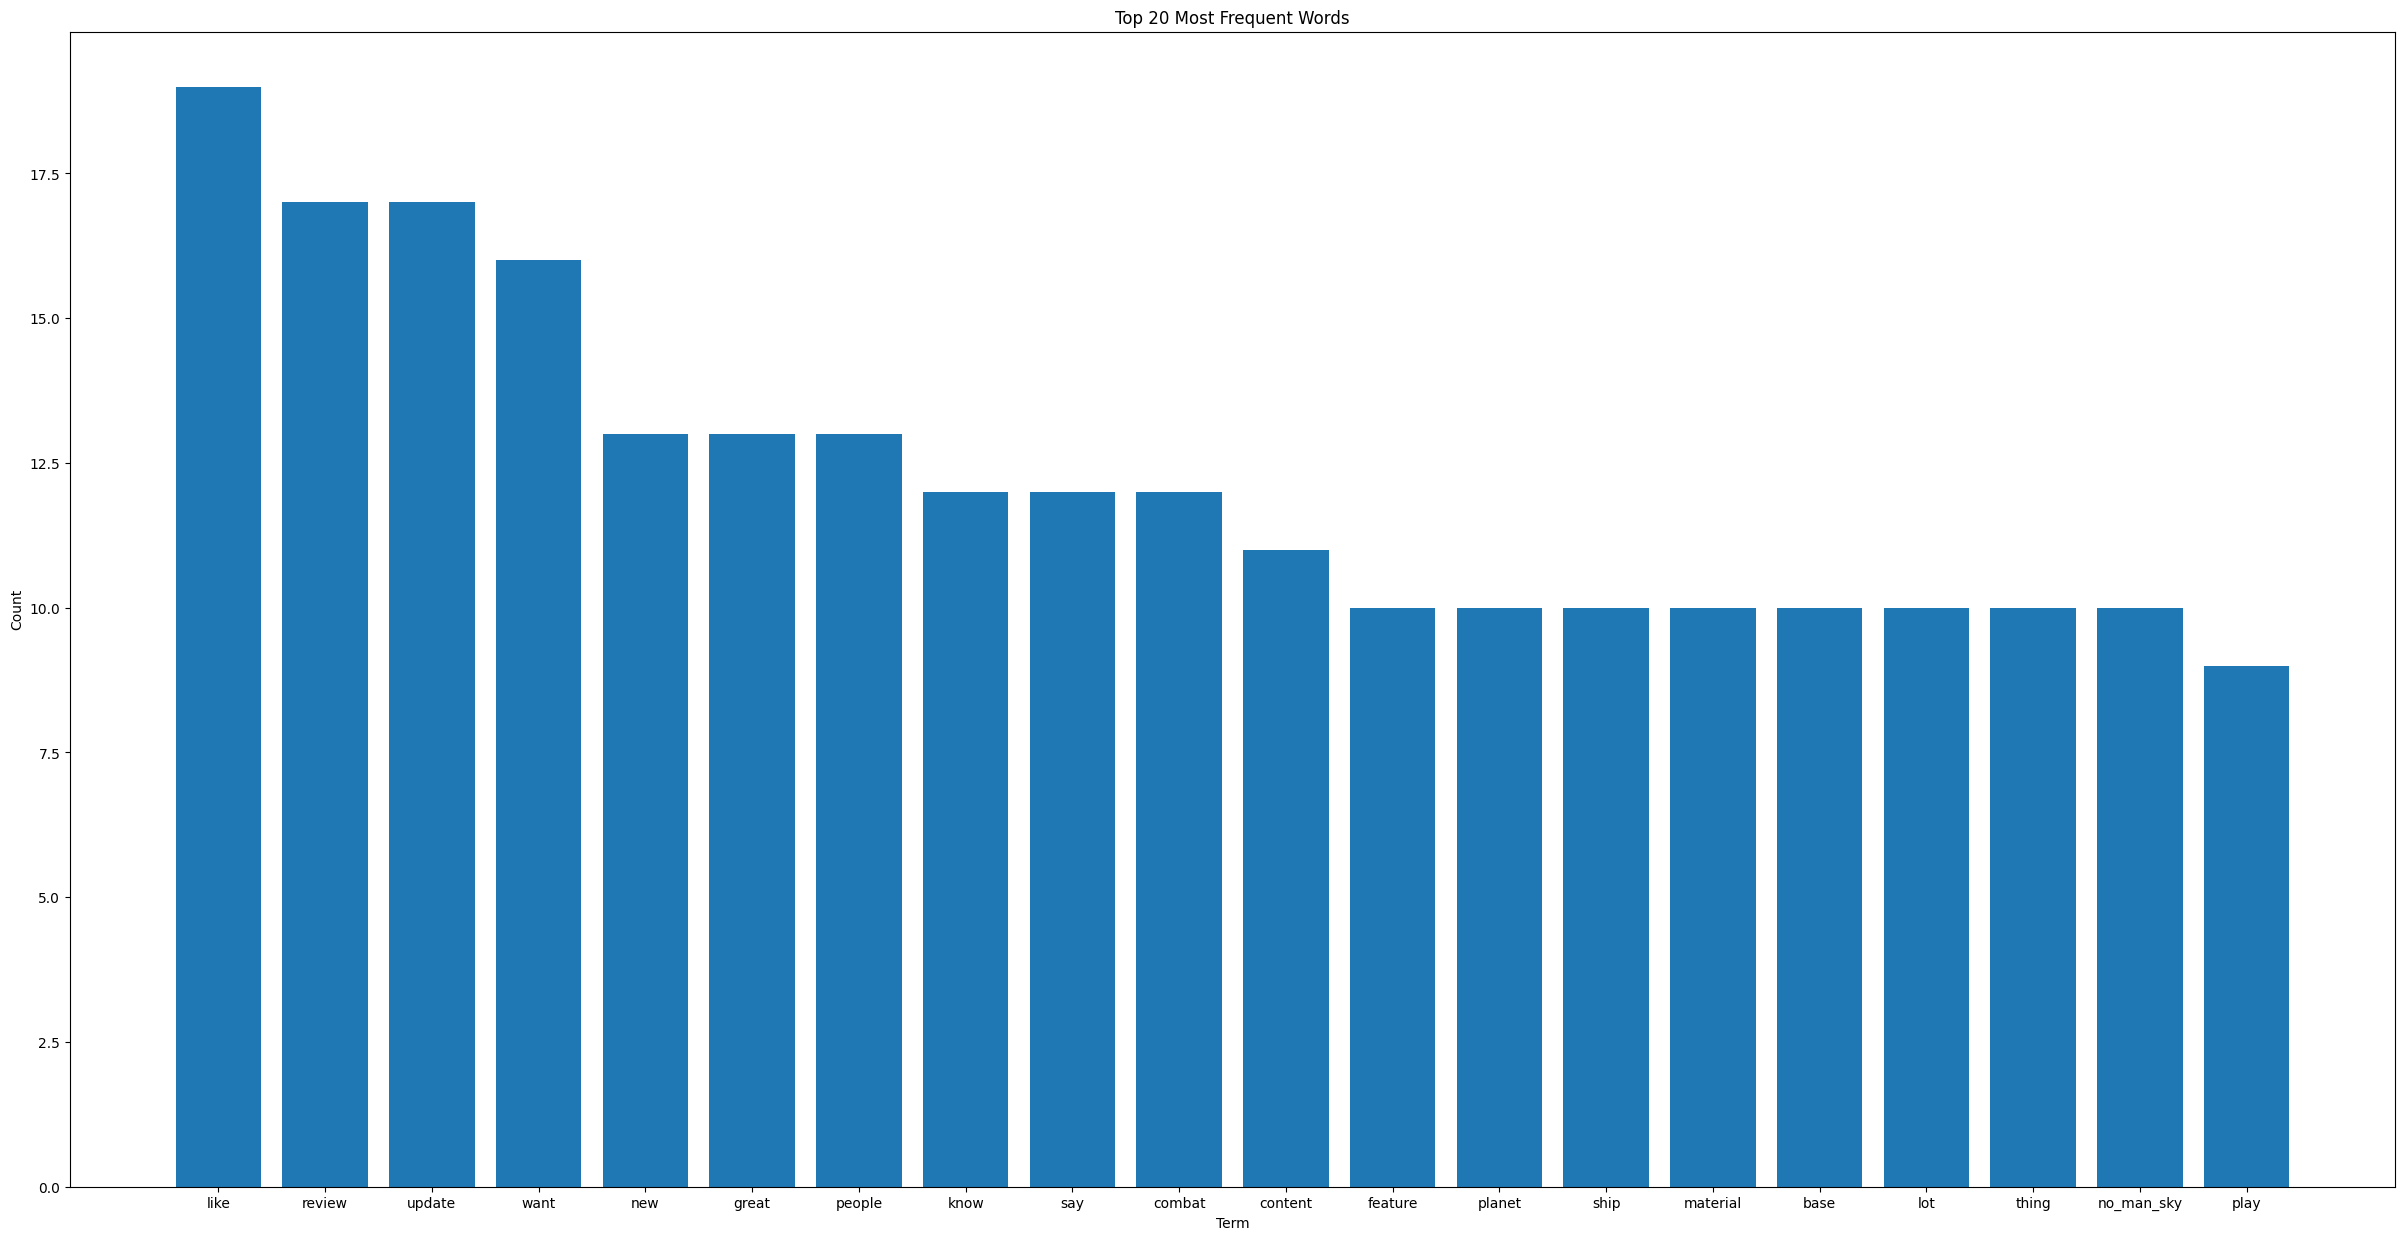

In [10]:
# get word frequencies from the bag of words and sort them by count in descending order
term_frequency = [(term, tf_matrix.sum(axis=0)[0, i]) for term, i in tf_vectorizer.vocabulary_.items()]
term_frequency = sorted(term_frequency, key = lambda x: x[1], reverse=True)
terms = [i[0] for i in term_frequency[:20]] # get top 20 words
count = [i[1] for i in term_frequency[:20]] # get counts of top 20 words

# plot the 20 most frequent words in a bar chart
fig, ax = plt.subplots(figsize=(30,15))
ax.bar(range(len(terms)), count)
ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms)
ax.set_title('Top 20 Most Frequent Words')
ax.set_xlabel('Term')
ax.set_ylabel('Count')
plt.show()

# Clustering (KMeans)

In [11]:
k = 4 # number of clusters

# build and fit model, then store centroids
km = KMeans(k)
km_matrix = km.fit_transform(tfidf_matrix)
km_centroids = km.cluster_centers_.argsort()[:, ::-1]

# create a dictionary with the top three words for each cluster
top_words = {}
for i in range(4):
    top_words[i] = ""
    for c in km_centroids[i, :3]:
        if top_words[i] == "":
            top_words[i] = tfidf_words[c]
        else:
            top_words[i] = top_words[i] + ", " + tfidf_words[c]
    print('Cluster %s:' %i, top_words[i])

Cluster 0: update, like, know
Cluster 1: want, like, space
Cluster 2: people, base, way
Cluster 3: combat, ground, ship


## Cluster Visualization (MDS, TSNE)

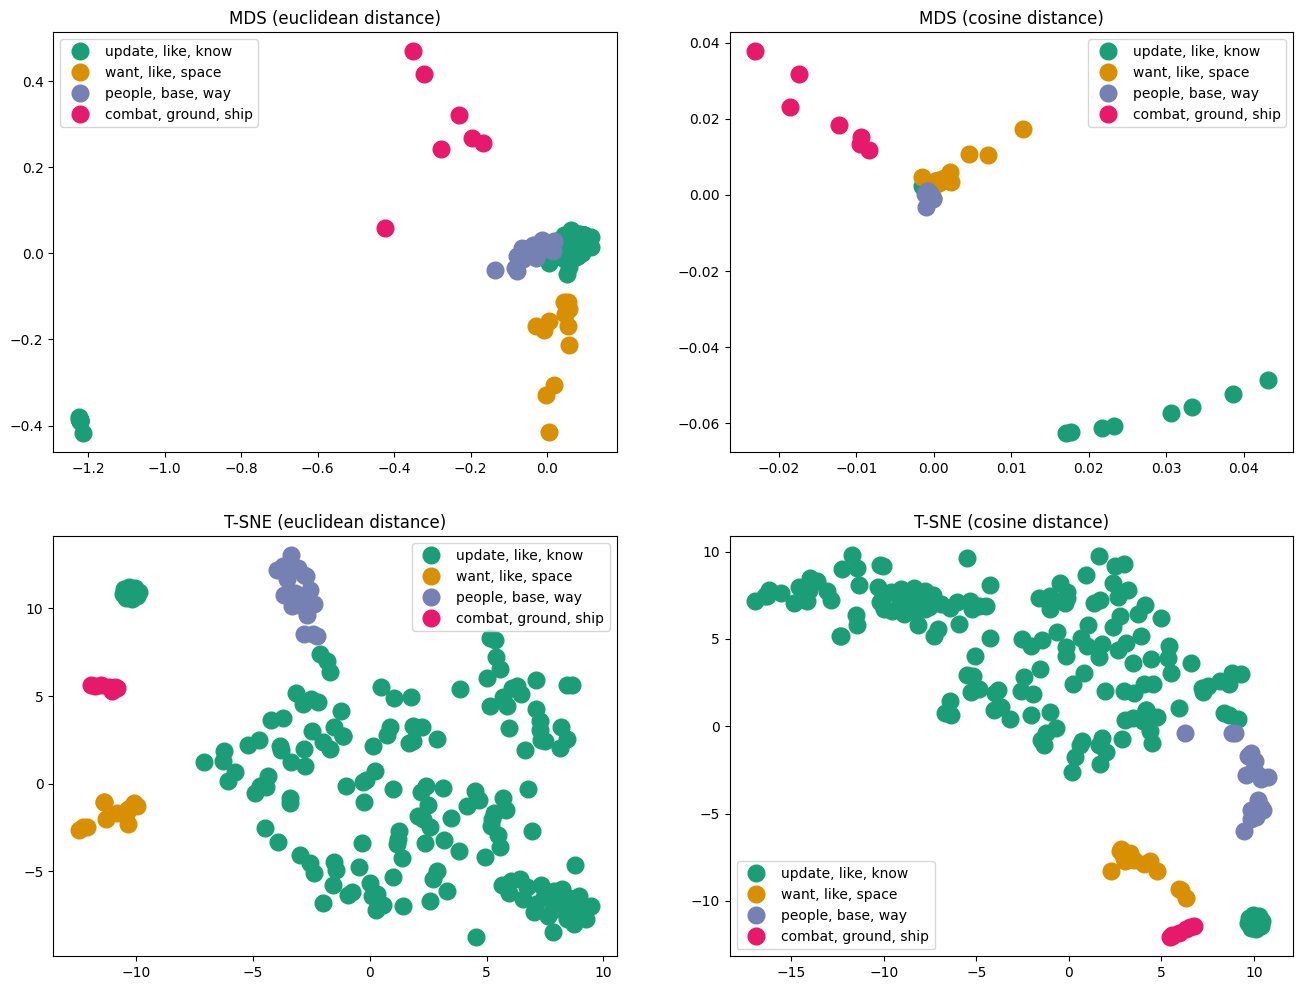

In [12]:
# fit two non-linear dimensionality reduction models
mds = MDS().fit_transform(km_matrix)
tsne = TSNE().fit_transform(km_matrix)

# fit models with cosine distance
cos_dist = 1 - cosine_similarity(km_matrix)
mds_cos = MDS(dissimilarity="precomputed").fit_transform(cos_dist)
tsne_cos = TSNE(metric="cosine").fit_transform(cos_dist)

# create data frame with coordinates, cluster labels, and post titles, grouped by clusters
df = pd.DataFrame(dict(x1=mds[:,0], y1=mds[:,1], x2=mds_cos[:,0], y2=mds_cos[:,1],
                       x3=tsne[:,0], y3=tsne[:,1], x4=tsne_cos[:,0], y4=tsne_cos[:,1],
                       label=km.labels_.tolist(), title=data['index']))
groups = df.groupby('label')

# set a color and get the top three words for each cluster
clusters = {0: ('#1b9e77', top_words[0]),
            1: ('#d98f02', top_words[1]),
            2: ('#7580b3', top_words[2]),
            3: ('#e7196a', top_words[3]), }

# build two plots for the manifold learning models
fig, ax = plt.subplots(2,2, figsize=(16,12)) # 2x2 subplots
ax[0,0].set_title('MDS (euclidean distance)'); ax[0,1].set_title('MDS (cosine distance)') # titles for first row
ax[1,0].set_title('T-SNE (euclidean distance)'); ax[1,1].set_title('T-SNE (cosine distance)') # titles for second row
for i,g in groups: # iterate over clusters
    ax[0,0].plot(g.x1, g.y1, marker='o', linestyle='', ms=12, color=clusters[i][0], label=clusters[i][1])
    ax[0,1].plot(g.x2, g.y2, marker='o', linestyle='', ms=12, color=clusters[i][0], label=clusters[i][1])
    ax[1,0].plot(g.x3, g.y3, marker='o', linestyle='', ms=12, color=clusters[i][0], label=clusters[i][1])
    ax[1,1].plot(g.x4, g.y4, marker='o', linestyle='', ms=12, color=clusters[i][0], label=clusters[i][1])
ax[0,0].legend(); ax[0,1].legend(); ax[1,0].legend(); ax[1,1].legend() # add legends

# save the figure as png and display it
plt.savefig('clusters.png', dpi=200)
plt.show()

## Cluster Exploration

AttributeError: 'int' object has no attribute 'title'

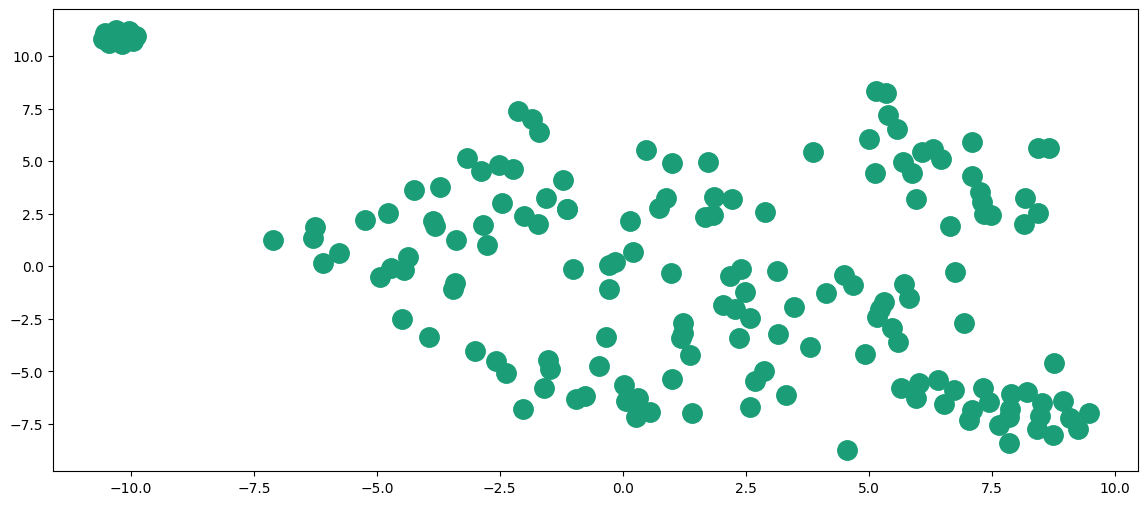

In [13]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      this.fig.toolbar.draw();
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}


# define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
  font-size:14px;
  font-weight: bold;
  color: White;
  background-color: DodgerBlue;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -75px;}
"""

# create plot
fig, ax = plt.subplots(figsize=(14,6))
for i,g in groups: # layer the plot by iterating through cluster labels
    points = ax.plot(g.x3, g.y3, marker='o', linestyle='', ms=14, color=clusters[i][0], label=clusters[i][1])
    labels = [i.title() for i in g.title] # get the blog posts titles in title case
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels, voffset=10, hoffset=10, css=css) # set tooltip

    mpld3.plugins.connect(fig, tooltip, TopToolbar()) # connect tooltip to fig
ax.legend(edgecolor='white') # add 

# save as html file and show plot
html = mpld3.fig_to_html(fig)
with open("clusters.html", "w") as file: file.write(html)
mpld3.display()

## Predictive Evaluation

In [14]:
# use model to predict the cluster for each title and content
title_predictions = []
content_predictions = []
for i in range(len(data['lda_token_2'])):
    titles = tfidf_vectorizer.transform([data['sentence'][i]])
    title_predictions.append(km.predict(titles))
    contents = tfidf_vectorizer.transform([data['lda_token_2'][i]])
    content_predictions.append(km.predict(contents))

# check how often a post's title and content are predicted to belong to the same cluster
match = []
for i in range(len(title_predictions)):
    if title_predictions[i] == content_predictions[i]:
        match.append(1)
    else:
        match.append(0)
print('Title/content match: ' + str(round(sum(match)/len(match)*100, 1)) + '%')

# test to what extent each manually defined topic category falls into its own cluster
category_predictions = []
for topic in ('psychology cognitive science', 'willpower self improvement',
            'philosophy spirituality', 'morality ethics'):
    Category = tfidf_vectorizer.transform([topic])
    category_predictions.append(km.predict(Category)[0])  
print('Category similarity: ' + str(len(set(category_predictions))/k*100) + '%')

Title/content match: 95.0%
Category similarity: 25.0%


# Models (NMF, LSA, LDA)

In [15]:
nmf = NMF(k)
nmf_matrix = nmf.fit_transform(tfidf_matrix)

lsa = TruncatedSVD(k)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

lda = LatentDirichletAllocation(k, learning_method='batch')
lda_matrix = lda.fit_transform(tf_matrix)

km_nmf = KMeans(k).fit(nmf_matrix) # NMF-based k-means
km_lsa = KMeans(k).fit(lsa_matrix) # LSA-based k-means
km_lda = KMeans(k).fit(lda_matrix) # LDA-based k-means

## Qualitative Evaluation

In [16]:
def top_words_decomp(model_name, model, terms):
    ''' prints the top 3 words of each cluster
        from the components of decomposition models '''
    print(model_name)
    for i, topic in enumerate(model.components_):
        print("Cluster %d: " % (i), end="")
        print(" ".join([terms[t] for t in topic.argsort()[:-4:-1]]))
    print()

top_words_decomp(" ---NMF---", nmf, tfidf_words)
top_words_decomp(" ---LSA---", lsa, tfidf_words)
top_words_decomp(" ---LDA---", lda, tf_words)
    
def top_words_cluster(model_name, centers):
    ''' prints the top 3 words of each cluster
        from the centroids of the k-means models '''
    print(model_name)
    for i in range(k):
        print("Cluster %d: " % i, end="")
        print(" ".join([tfidf_words[c] for c in centers[i, :3]]))
    print()

top_words_cluster(" ---K-M---", km_centroids)
top_words_cluster(" ---NMF-KM---", nmf.inverse_transform(km_nmf.cluster_centers_).argsort()[:, ::-1])
top_words_cluster(" ---LSA-KM---", lsa.inverse_transform(km_lsa.cluster_centers_).argsort()[:, ::-1])

 ---NMF---
Cluster 0: update content add
Cluster 1: want like people
Cluster 2: combat love ground
Cluster 3: exploration feel result

 ---LSA---
Cluster 0: like want update
Cluster 1: want like combat
Cluster 2: love combat say
Cluster 3: exploration content add

 ---LDA---
Cluster 0: combat review people
Cluster 1: know big exploration
Cluster 2: like planet enjoy
Cluster 3: feature update base

 ---K-M---
Cluster 0: update like know
Cluster 1: want like space
Cluster 2: people base way
Cluster 3: combat ground ship

 ---NMF-KM---
Cluster 0: update content add
Cluster 1: want like people
Cluster 2: combat love ground
Cluster 3: exploration feel result

 ---LSA-KM---
Cluster 0: content add exploration
Cluster 1: update love know
Cluster 2: like want people
Cluster 3: love combat thing



## Autoencoder

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

learning_rate = 0.001
training_epochs = 501

n_input = tfidf_matrix.shape[1]
n_hidden_1 = tfidf_matrix.shape[1] // 4
n_hidden_2 = 4

X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

enc = encoder(X)
dec = decoder(enc)

cost = tf.reduce_mean(tf.pow(X - dec, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.InteractiveSession() # interactive for jupyter notebook
sess.run(init)

for epoch in range(training_epochs):
    for i in range(len(data)): # one batch per blog post
        _, c = sess.run([optimizer, cost], feed_dict={X: tfidf_matrix[i].toarray()})
    if epoch % 100 == 0: # display every hundredth epoch
        print("Epoch:", '%03d' % epoch, "cost =", "{:.9f}".format(c))

autoenc_results = dec.eval(feed_dict={X: tfidf_matrix.toarray()})      
sess.close()

Instructions for updating:
non-resource variables are not supported in the long term
Epoch: 000 cost = 0.023117475
Epoch: 100 cost = 0.003037497
Epoch: 200 cost = 0.002767700
Epoch: 300 cost = 0.002118861
Epoch: 400 cost = 0.001985843
Epoch: 500 cost = 0.002003616


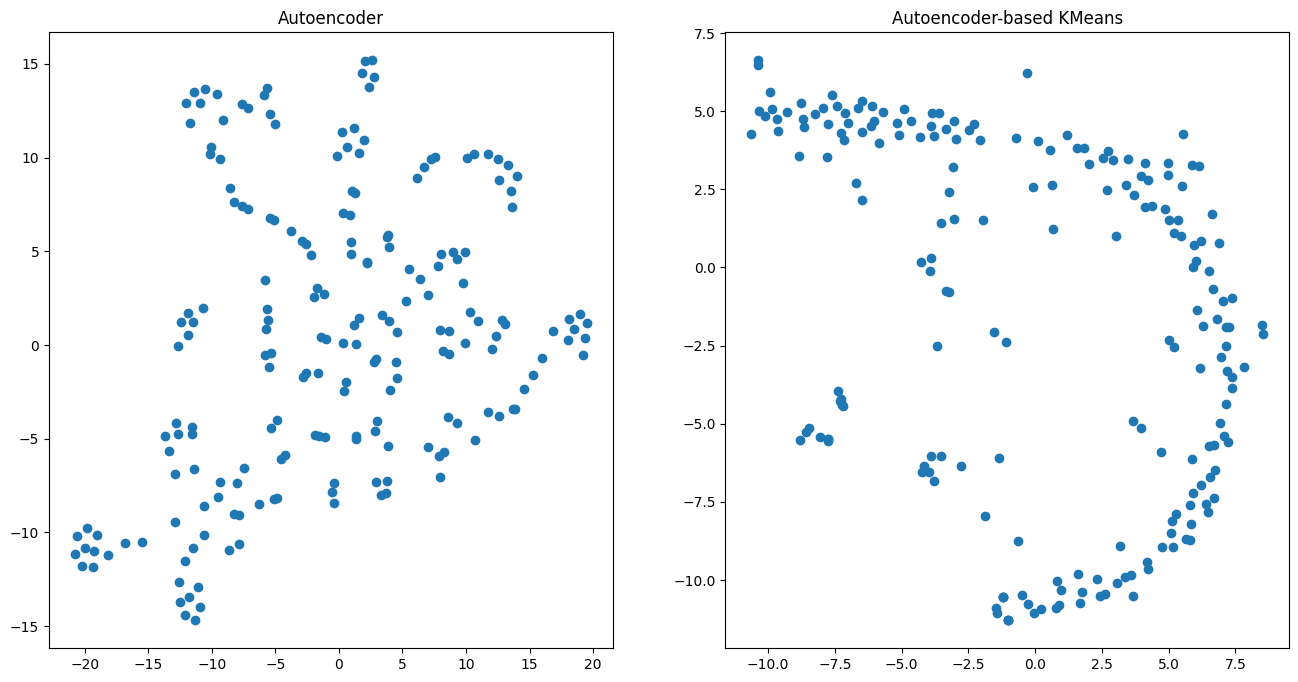

In [18]:
km_autoenc = KMeans(k).fit(autoenc_results) # autoencoder-based k-means

# fit T-SNE with cosine distance of autoencoder and autoencoder-based k-means results
cos_dist_autoenc = 1 - cosine_similarity(autoenc_results)
tsne_autoenc = TSNE(metric="cosine").fit_transform(cos_dist_autoenc)
cos_dist_km_autoenc = 1 - cosine_similarity(KMeans(k).fit_transform(autoenc_results))
tsne_km_autoenc = TSNE(metric="cosine").fit_transform(cos_dist_km_autoenc)

# plot T-SNE results
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('Autoencoder')
ax[0].scatter(tsne_autoenc[:,0], tsne_autoenc[:,1])
ax[1].set_title('Autoencoder-based KMeans')
ax[1].scatter(tsne_km_autoenc[:,0], tsne_km_autoenc[:,1])
plt.show()

## Quantitative Evaluation

In [19]:
# create evaluation table
evaluation = pd.DataFrame({'Model': ['km', 'km_nmf', 'km_lsa', 'km_lda', 'km_autoenc']})
sc, wcss, chi = [], [], []

# calculate scores
for model in (km, km_nmf, km_lsa, km_lda, km_autoenc):
    sc.append(silhouette_score(tfidf_matrix.toarray(), model.labels_))
    wcss.append(round(model.inertia_, 2))
    chi.append(round(calinski_harabasz_score(tfidf_matrix.toarray(), model.labels_), 2))

# use term frequency matrix for LDA
sc[-2] = silhouette_score(tf_matrix.toarray(), km_lda.labels_)
chi[-2] = round(calinski_harabasz_score(tf_matrix.toarray(), model.labels_), 2)

# fill and display evaluation table
evaluation['Silhouette'] = sc
evaluation['WCSS'] = wcss
evaluation['Calinski-Harabasz'] = chi
evaluation.head()

,Model,Silhouette,WCSS,Calinski-Harabasz
0,km,0.022344,180.03,2.82
1,km_nmf,0.025713,1.92,3.08
2,km_lsa,0.019010,6.29,2.81
3,km_lda,-0.042545,6.30,2.76
4,km_autoenc,0.015909,91.32,2.59
